# Missing Data Handling

### What are the different types of Missing Data?
__1. Missing Completely at Random (MCAR) :__  A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on, that makes some data more likely to be missing than other.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic_train_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#finding out null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

__Why there are more missing values in 'Age' and 'Cabin' column? Do they have some kind of relation?__  
- Yes there is relationship between 'Age' and 'Cabin'.
- This data is collected after the accident happened. After the accident happened, the person details (Name, Sex, PassengerId, Ticket, Fare, Pclass, Survived) are there but when we went to ask the person's age, the people are already dead. Who will give the answer. No family members are there. Because of that most of the NaN values are there w.r.t 'Age'.
- Why 'Cabin' is related to 'Age'? The person who are dead & whose 'Age' is also missing, might be staying in that particular Cabin which is missing. Probably because of which, that information is not recorded.  

__Can you say that 'Age' and 'Cabin' missing values are missing completely at random (MCAR)?__  
- As there is some relationship between the 'Age' and 'Cabin', we can not say that the missing values in these two columns are of the type MCAR.  

__Is 'Embarked' is of the type MCAR?__
- Here we have 2 NaN values. Embarked means from which station the passengers had been picked up. And we dont have any clue why there is these 2 NaN values. Hence it is an example of ECAR. 

In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


__2. Missing Data Not At Random (MNAR) (Systematic missing values) :__ When data is MNAR, there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. Example: 'Age' and 'Cabin'

In [10]:
#wherever in Cabin there is NaN,we will convert that NaNs to 1s and 0s

import numpy as np
#creating a new column
#wherever there is NaN in Cabin, we are replacing it with 1, else 0
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0) 

#find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


__If a person had survived i.e. 1 in 'Survived' column, the value of 'Cabin' should not be missing i.e. 1 in cabin_null column.  So what percentage of survived people is having non-missing values in 'Cabin' column?__

In [12]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

- So it can be seen from above result that, from the survived people 60% of them are having missing values in 'Cabin' column. From the non-survived people 87% of having missing values in 'Cabin' column.
- Again this missing % is true. Because for the people who have not survived, that only information will be missing. So definitely this above result shows that the % is higher than the % for the people who have survived.

__3. Missing At Random (MAR):__ Example: Men hide their Salary, Women hide their Age.

# Techniques to handle missing values:
__1. Mean/Median/Mode replacement__  
__2. Random Sample Imputation__  
__3. Capturing NaN values with a new feature__  
__4. End of Distribution imputation__  
__5. Arbitrary imputation__  
__6. Frequent categories imputation__

## Mean/Median/Mode replacement
- Replace the NaN values with Mean/Median/Mode values.

__When to apply this technique?__  
- Mean/Median imputation has the assumption that the data are missing completely at random (MCAR). We solve this by replacing the NaN with the most frequent occurance of the variable.

In [15]:
df = pd.read_csv('titanic_train_dataset.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
#% of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

- So there is missing values in Age feature. We have to fill these missing values with mean/median of the feature.

In [21]:
#creating a function which will impute NaN values with Mean/Median
#df is the dataset, feature_name is the feature in which we will replace NaN values
#mode is either Mean or Median value of the selected feature, which will replace the NaN values.
def impute_nan(df, feature_name, mode):
    df[feature_name + '_median'] = df[feature_name].fillna(mode)

In [20]:
#finding out the median of the 'Age'feature
median_value = df.Age.median()
median_value

28.0

- Here we are not taking the Mean of the feature as there might be outliers. And mean value is affected by the outliers.

In [22]:
#calling the above created function
impute_nan(df, 'Age', median_value)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


- Age_median is the new column that we created in the function to separately store the updated values of Age feature.

In [33]:
#comparing Age & Age_median
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


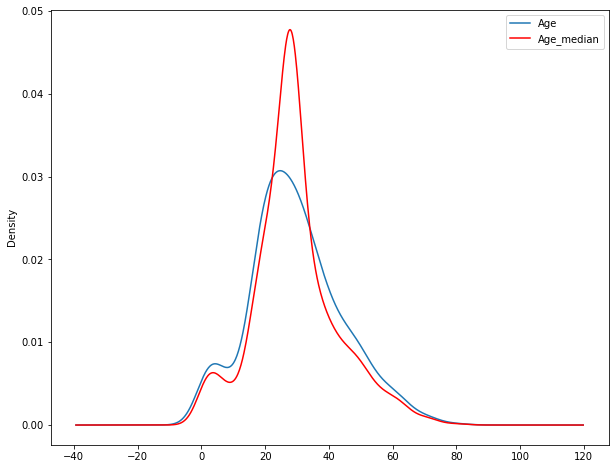

In [39]:
#plotting
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
df['Age'].plot(kind = 'kde', ax = ax)
df['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

__Advantages of Mean/Median Imputaion:__  
- Easy to implement (Robust to outliers)
- Faster way to obtain the complete dataset

__Disadvantages of Mean/Median Imputation:__  
- Change or distortion in the original variance
- Impacts Correlation